In [1]:
!pip install coppeliasim-zmqremoteapi-client


  Preparing metadata (setup.py) ... done
  Created wheel for cbor: filename=cbor-1.0.0-cp311-cp311-linux_x86_64.whl size=53930 sha256=8319d4e43daa5258f345811c49f1f17be8436e253fc727a70d0a482c63db1bb4
  Stored in directory: /root/.cache/pip/wheels/21/6b/45/0c34253b1af07d1d9dc524f6d44d74a6b191c43152e6aaf641
Successfully built cbor


In [1]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# Dirección del túnel ngrok
host = '0.tcp.sa.ngrok.io'
port = 10048  # Este es el puerto que te dio ngrok

try:
    #client = RemoteAPIClient(host, port)
    client = RemoteAPIClient(host, port)
    sim = client.getObject('sim')
    print("✅ Conectado a CoppeliaSim vía ZMQ + ngrok")
except Exception as e:
    print(f"❌ Error al conectar: {e}")

✅ Conectado a CoppeliaSim vía ZMQ + ngrok


**Atividade Prática – Geração de Trajetória Linear e Controle de Manipuladores no CopeliaSim**

**Descrição Geral:**

Nesta atividade, o estudante deverá desenvolver um código de controle para um manipulador robótico, com o objetivo de gerar uma trajetória linear no espaço cartesiano, partindo de um ponto A até um ponto B, utilizando uma estratégia de controle de movimento específica e um tipo de manipulador definido conforme as regras abaixo. O robô será simulado no ambiente **CopeliaSim**.

**1. Definição do Manipulador:**

A seleção será feita conforme a seguinte regra:

*   Considere sua matrícula composta por seis dígitos: RSTXYZ.
*   Calcule: Resto de divisão inteira da matrícula por 3: Matrícula % 3.
*   Resultado:

   0 → SCARA

   1 → Cilíndrico

   2 → Esférico ou Polar




Matrícula: 98225

Transformamos para 6 dígitos: 098225

Calculamos:

098225 % 3 = 2

🔹 Resultado 2 → Manipulador Esférico ou Polar

**2. Estratégia de Geração de Trajetória:**

Se Z for par → Tempo mínimo (bang-bang).

Se Z for ímpar → Polinomial de 3ª ordem.

O tempo total destinado para execução da trajetória será dado pela soma dos dígitos da matrícula.
 Matrícula: 072943

 Tempo total: 0+7+2+9+4+3 = 25s

Dígito Z é o último da matrícula: 5

Como 5 é ímpar, a estratégia será:

🔹 Trajetória polinomial de 3ª ordem

Tempo total da trajetória = soma dos dígitos:

0 + 9 + 8 + 2 + 2 + 5 = 26 segundos

**3. Pontos de Partida e Chegada:**

*   Partida: [-0.5, -0.5, 0.5] m.
*   Chegada: [0.5, 0.5, 1.5] m.
*   Para cada componente, se o dígito correspondente for par, soma-se 0.25, caso contrário, subtrai-se 0.25.
*   NOTA: Caso o ponto de partida, de chegada ou mesmo algum ponto da trajetória de referência apresente alguma restrição quando o movimento do efetuador, por exemplo, colisão com o corpo do robô ou se localizar fora do espaço de trabalho do manipulador, faça a adequação necessária e informe o motivo da alteração.

**Exemplo:**

Matrícula: 072943

*  Ponto A = [-0.5, -0.5, 0.5] + [0.25, -0.25, 0.25] → [-0.25, -0.75, 0.75]
*  Ponto B = [0.5, 0.5, 1.5] + [-0.25, 0.25, -0.25] → [0.25, 0.75, 1.25]

**Referência original:**

*  Partida: [-0.5, -0.5, 0.5]
*  Chegada: [0.5, 0.5, 1.5]

Vamos aplicar a regra dos dígitos para ajustar:

| Componente   | Dígito | Par/Ímpar | Ajuste |
| ------------ | ------ | --------- | ------ |
| x1 (Partida) | 0      | Par       | +0.25  |
| y1           | 9      | Ímpar     | -0.25  |
| z1           | 8      | Par       | +0.25  |
| x2 (Chegada) | 2      | Par       | +0.25  |
| y2           | 2      | Par       | +0.25  |
| z2           | 5      | Ímpar     | -0.25  |

🔹 Ponto de partida ajustado:

[-0.5, -0.5, 0.5] + [0.25, -0.25, 0.25]
= [-0.25, -0.75, 0.75] m

🔹 Ponto de chegada ajustado:

[0.5, 0.5, 1.5] + [0.25, 0.25, -0.25]
= [0.75, 0.75, 1.25] m

 Resumo Final para a Matrícula ES98225 (098225)
Manipulador: Esférico/Polar

Tipo de trajetória: Polinomial de 3ª ordem

Tempo total: 26 segundos

Ponto de partida: [-0.25, -0.75, 0.75]

Ponto de chegada: [0.75, 0.75, 1.25]

4. Tarefas do Estudante:

*   Calcular o alcance máximo e mínimo do manipulador, representando graficamente.


[SUCCESS] Conectado ao CoppeliaSim
[SUCCESS] Manipulador carregado com sucesso.
[INFO] Iniciando varredura da área de trabalho...
  - 100/1000 pontos coletados...
  - 200/1000 pontos coletados...
  - 300/1000 pontos coletados...
  - 400/1000 pontos coletados...
  - 500/1000 pontos coletados...
  - 600/1000 pontos coletados...
  - 700/1000 pontos coletados...
  - 800/1000 pontos coletados...
  - 900/1000 pontos coletados...
  - 1000/1000 pontos coletados...


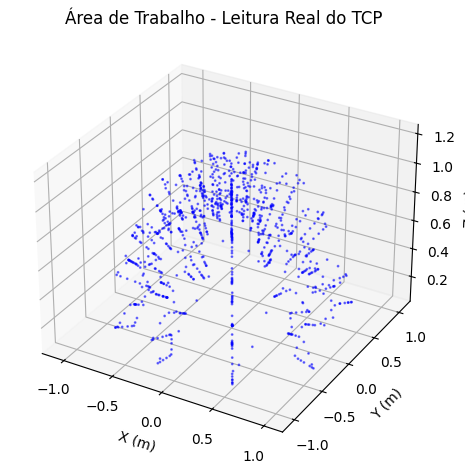

[DONE] Simulação finalizada.


In [11]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import time
import math
import numpy as np
import matplotlib.pyplot as plt

def connect_to_coppeliasim():
    client = RemoteAPIClient()
    sim = client.getObject('sim')
    print('[SUCCESS] Conectado ao CoppeliaSim')
    return sim

def get_esferico_axes(sim):
    axes = {
        'axis1': sim.getObject('/Manipulador/axis1'),  # Rotativo base
        'axis2': sim.getObject('/Manipulador/axis2'),  # Rotativo plano vertical
        'axis3': sim.getObject('/Manipulador/axis3'),  # Linear (alongamento)
    }
    return axes

def generate_workspace(sim, axes, tcp_handle):
    print('[INFO] Iniciando varredura da área de trabalho...')

    theta1_range = np.radians(np.linspace(-180, 180, 10))  # junta
    theta2_range = np.radians(np.linspace(0, 90, 10))  # junta
    d3_range = np.linspace(0.0, 0.5, 10)               # linear

    points = []

    total = len(theta1_range) * len(theta2_range) * len(d3_range)
    count = 0

    for t1 in theta1_range:
        for t2 in theta2_range:
            for d3 in d3_range:
                # Comando de posição
                sim.setJointTargetPosition(axes['axis1'], t1)
                sim.setJointTargetPosition(axes['axis2'], t2)
                sim.setJointTargetPosition(axes['axis3'], d3)
                time.sleep(0.1)

                # Leitura real da posição do TCP
                pose = sim.getObjectPose(tcp_handle, -1)
                position = pose[:3]
                points.append(position)

                count += 1
                if count % 100 == 0:
                    print(f'  - {count}/{total} pontos coletados...')

    return np.array(points)

def plot_workspace(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, alpha=0.5, c='blue')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_title('Área de Trabalho - Leitura Real do TCP')
    plt.tight_layout()
    plt.show()

def main():
    sim = connect_to_coppeliasim()
    scene_path = '/home/usuario/compartilhado/Robotica/Esferico.ttt'
    result = sim.loadScene(scene_path)
    if result == 0:
        raise RuntimeError("Erro ao carregar a cena.")
    print("[SUCCESS] Manipulador carregado com sucesso.")

    sim.startSimulation()
    time.sleep(0.5)

    axes = get_esferico_axes(sim)
    tcp_handle = sim.getObject('/Manipulador/axis4')

    points = generate_workspace(sim, axes, tcp_handle)
    plot_workspace(points)

    sim.stopSimulation()
    print('[DONE] Simulação finalizada.')

if __name__ == "__main__":
    main()
